Import the basic packages. I will setup the packages where ever it is required in the code cell.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn

Setting up the basic changes to the notebook i.e (graph sizes, colours of plots, etc,.

In [2]:
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('dark')
%matplotlib inline


Import the data.

**Each row is an observation (also known as : sample, example, instance, record) **

**Each column is a feature (also known as: Prameter,Predictor, attribute, Independent Variable, input, regressor, Covariate)**

In [3]:
df_train=pd.read_csv("../input/train.csv")
df_test=pd.read_csv("../input/test.csv")  

# NOTE:    0= Not Survived, 1= Survived

After adding at data, Check whether the data is in data frame or not

In [4]:
type(df_train)

pandas.core.frame.DataFrame

In [5]:
type(df_test)

pandas.core.frame.DataFrame

**Exploratory Data Analysis**

* Understanding the data in deeper way and removing of unwanted columns.
* Visualization of data for better understanding.

**SCATTER PLOT **


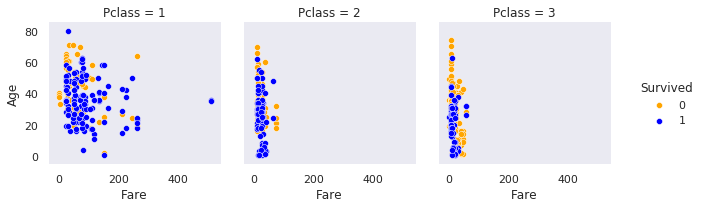

In [6]:
# Modify the graph above by assigning each species an individual color.

g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"blue", 0:"orange"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

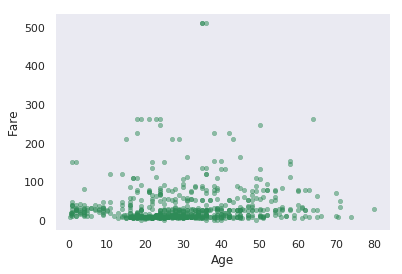

In [7]:
df_train.plot(kind='scatter', x='Age', y='Fare',alpha = 0.5,color = 'seagreen')  #here alpha is color darkness of points

**Box Plot**

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.[wikipedia]

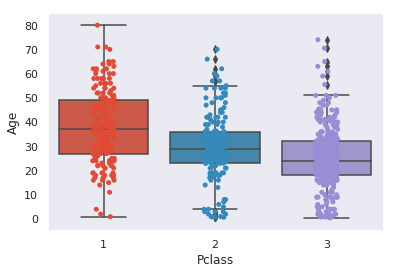

In [8]:
ax= sns.boxplot(x="Pclass", y="Age", data=df_train)
ax= sns.stripplot(x="Pclass", y="Age", data=df_train, jitter=True, edgecolor="black")
plt.show()

**Histograms for the train data**

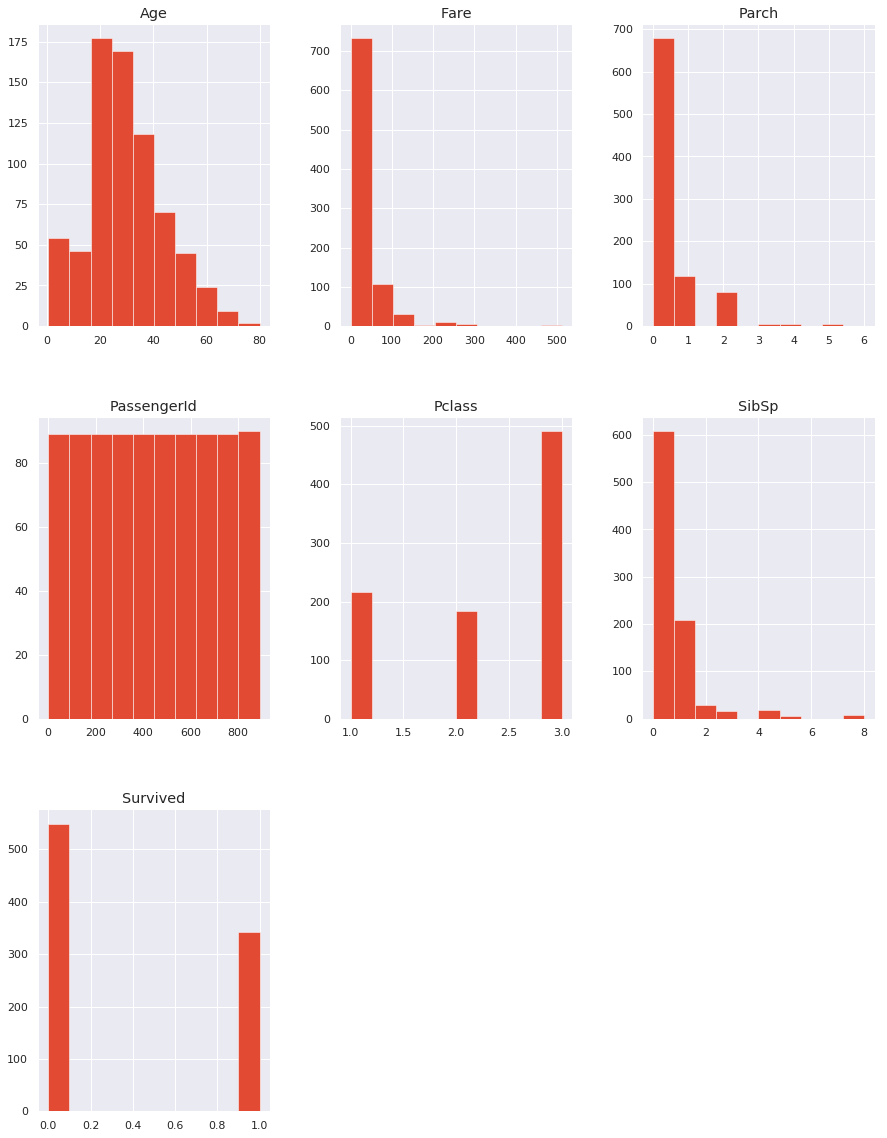

<Figure size 432x288 with 0 Axes>

In [9]:
df_train.hist(figsize=(15,20));
plt.figure();

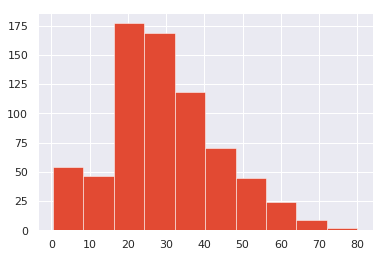

In [10]:
df_train["Age"].hist();

Here we can plot using bins or binnin method, I will discuss about that in below comming cells. (main idea about binning is: it will show [0-10],[20-30], etc, age grops

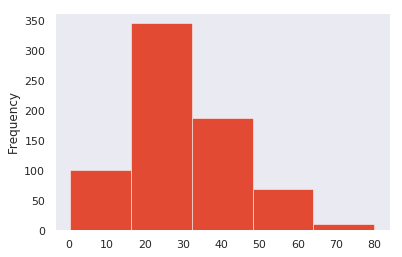

In [11]:
df_train.Age.plot(kind = 'hist',bins = 5);

 for more about matplotlib plots refer this link 

 https://www.southampton.ac.uk/~fangohr/training/python/notebooks/Matplotlib.html 

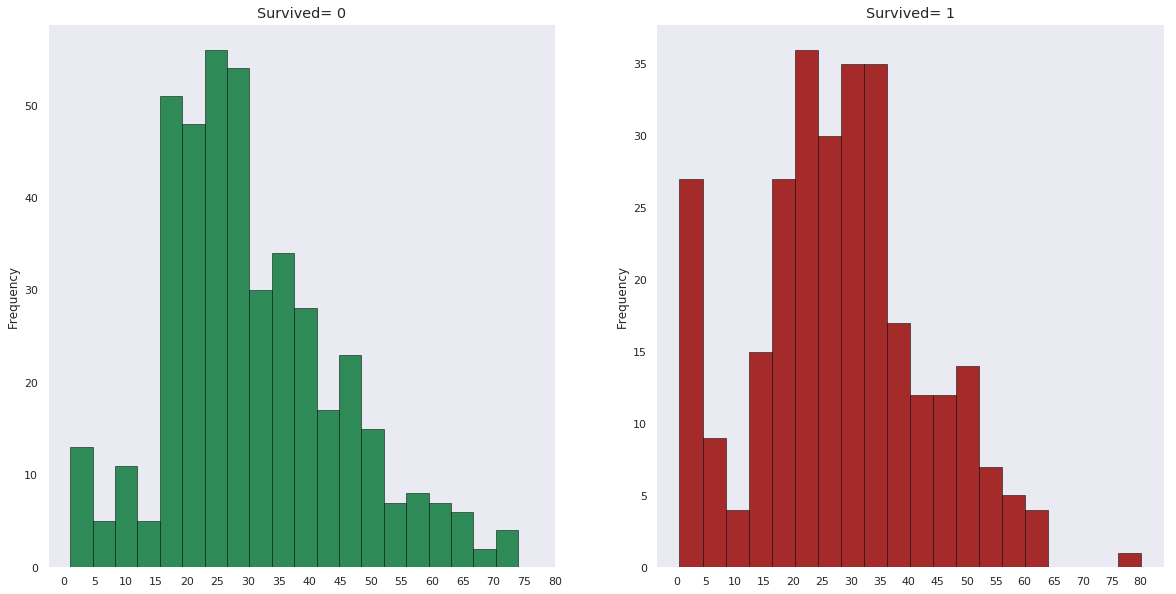

In [12]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='seagreen')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='brown',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

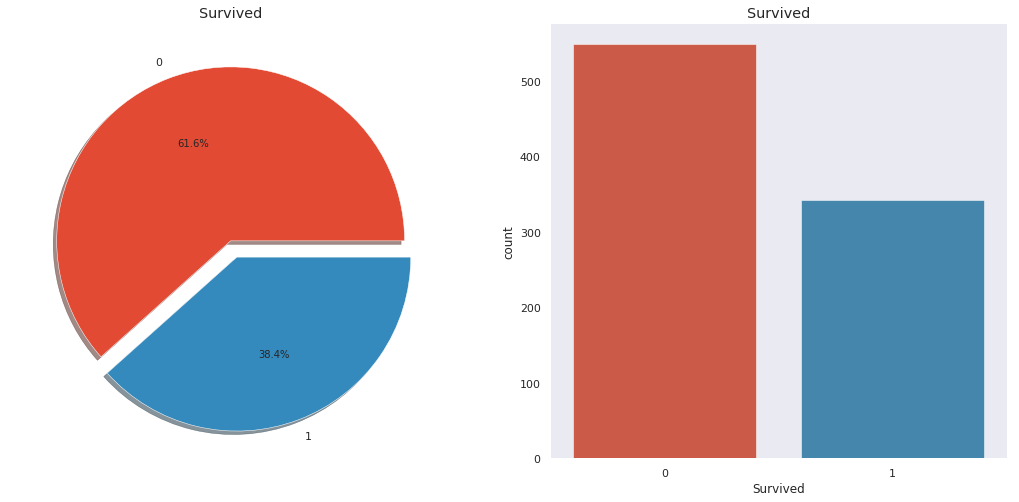

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

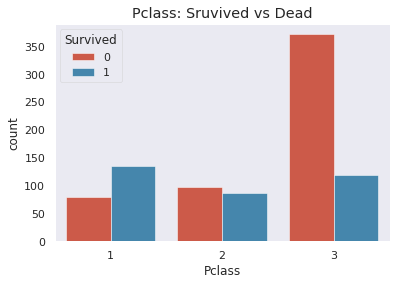

In [14]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

**Data Preprocessing**

Data preprocessing refers to the transformations applied to our data before feeding it to the algorithm.

Data Preprocessing is a technique that is used to convert the **raw data** into a **clean data set**. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis. there are plenty of steps for data preprocessing and we just listed some of them :

**removing Target column (id)**

**Sampling (without replacement)**

**Dealing with Imbalanced Data**

**Introducing missing values and treating them (replacing by average values)**

**Noise filtering**

**Data discretization**

**Normalization and standardization**

**PCA analysis**

**Feature selection (filter, embedded, wrapper)****

In [15]:
df_train.shape

(891, 12)

In [16]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)
    

In [17]:
 check_missing_data(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0,0,0,0,0,0.00198653,0,0,0,0,0.00771044,2.24467e-05
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [18]:
 check_missing_data(df_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,86,0,0,0,1,327,0
Percent,0,0,0,0,0.00205742,0,0,0,2.39234e-05,0.00782297,0
Types,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [19]:
print(df_train.info())
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df_train['Age'].unique() #here lot of unique values are there, If we train the model with this ages we can get the model biased

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [21]:
df_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S


In [25]:
df_train.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [26]:
X = df_train.iloc[:, :-1].values  #ALL ROWS AND COLUMNS(-1 SAYS THAT"EXCEPT LAST COLUMN")
y = df_train.iloc[:, -1].values   #ONLY LAST COLUMN WILL PRINTS

**Data Cleaning And Data Preparation For The Model**

The primary goal of data cleaning is to detect and remove errors and anomalies to increase the value of data in analytics and decision making.
If data cleaning and preparation has been done correctly 70% of the problem will get finished.



**Transforming Features**

Data transformation is the process of converting data from one format or structure into another format or structure[wiki]

Age
Cabin
Fare
Name



Here lot of unique values are there in age column, If we train the model with this ages we can get the model will get biased.So like what I had said previously

**"Binning Concept"**

Learn more about Binning Concept from the below link.

https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b

In [27]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

df_train = transform_features(df_train)
df_test = transform_features(df_test)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


**Feature Encoding: Converting Categorical to Numerical**

In machine learning projects, one important part is feature engineering. It is very common to see categorical features in a dataset. However, our machine learning algorithm can only read numerical values. It is essential to encoding categorical features into numerical values.

Encode labels with value between 0 and n_classes-1

LabelEncoder can be used to normalize labels.
It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [28]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
        
        

In [29]:
df_train,df_test = encode_features(df_train,df_test)
df_train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [30]:
x_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x_all, y_all, test_size=0.3, random_state=100)

# Metrics Evaluation
## What is precision, recall, prediction, specificity, and F1-score?

**PRECISION: **        Choose precision when you want to know how much correctly the alogorithm is classified the true positives(correctly showed positive   results whether he is Diabetic or not)

**RECALL:**                Choose recall when you want to know how much it is showing wrongly classified as false positive (for ex: prediction (+ve)= Healthy, Prediction (–ve)= Diabetic)

**SPECIFICITY: **      If you don’t want any false positives. Only the correct true positive will be choosen.

**ACCURACY: **       How much percentage of your algorithm correctly classified.

Yes, accuracy is a great measure but only when you have symmetric datasets (false negatives & false positives counts are close), also, false negatives & false positives have similar costs.

If the cost of false positives and false negatives are different then F1 is your savior. F1 is best if you have an uneven class distribution.



**Bottom Line is**

— Accuracy value of 90% means that 1 of every 10 labels is incorrect, and 9 is correct.
— Precision value of 80% means that on average, 2 of every 10 diabetic labeled student by our program is healthy, and 8 is diabetic.
— Recall value is 70% means that 3 of every 10 diabetic people in reality are missed by our program and 7 labeled as diabetic.
— Specificity value is 60% means that 4 of every 10 healthy people in reality are miss-labeled as diabetic and 6 are correctly labeled as healthy.

If you want to know more about go throgh this link https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124



# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
rfc = RandomForestClassifier()
#help(RandomForestClassifier())

# Choose some parameter combinations to try
parameters = { 
              'n_estimators': [4,6,9],
              'max_features': [ 'sqrt'], #['sqrt','log2','auto']
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,3,5,10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(rfc, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rfc_prediction = rfc.predict(X_test)
rfc_score=accuracy_score(y_test, rfc_prediction)
print(rfc_score)

0.8022388059701493


# XGBOOST

In [34]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, min_samples_split=200,min_samples_leaf=40,max_depth=2,max_features='sqrt',subsample=0.8,random_state=10).fit(X_train, y_train)
xgb_prediction = xgboost.predict(X_test)
xgb_score=accuracy_score(y_test, xgb_prediction)
print(xgb_score)

0.835820895522388


# Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
logreg_prediction = logreg.predict(X_test)
logreg_score=accuracy_score(y_test, logreg_prediction)
print(logreg_score)

0.7947761194029851


# SVM(Support Vector Machine)


In [37]:
from sklearn.svm import SVC
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
svc_prediction= clf.predict(X_test)
svc_score=accuracy_score(y_test,svc_prediction)
print(svc_score)

0.7798507462686567


In [39]:
X_train = df_train.drop("Survived",axis=1)
X_train = X_train.drop("PassengerId",axis=1)
X_test  = df_test.drop("PassengerId",axis=1)
y_train = df_train["Survived"]


X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,3,1,4,1,0,0,7,100,19
1,1,0,0,1,0,3,2,182,20
2,3,0,7,0,0,0,7,329,16
3,1,0,7,1,0,3,2,267,20
4,3,1,7,0,0,1,7,15,19


In [40]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, min_samples_split=200,min_samples_leaf=40,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10).fit(X_train, y_train)
Y_pred = xgboost.predict(X_test)

In [41]:
submission_file = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
submission_file.to_csv('submission_file.csv', index=False)

## Conclusion
In this I had explained about some of the machine learning models along with reference links. 

More yet to come!!

### I hope you find this kernel helpful and some UPVOTES would be very much appreciated


### References

1. https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124
2. https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-with-python (Thanks to mjbahmani for your detailed kernel)
3. https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b
 